In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [19]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [20]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [21]:
df.duplicated().sum()

240

In [22]:
df = df.drop_duplicates()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


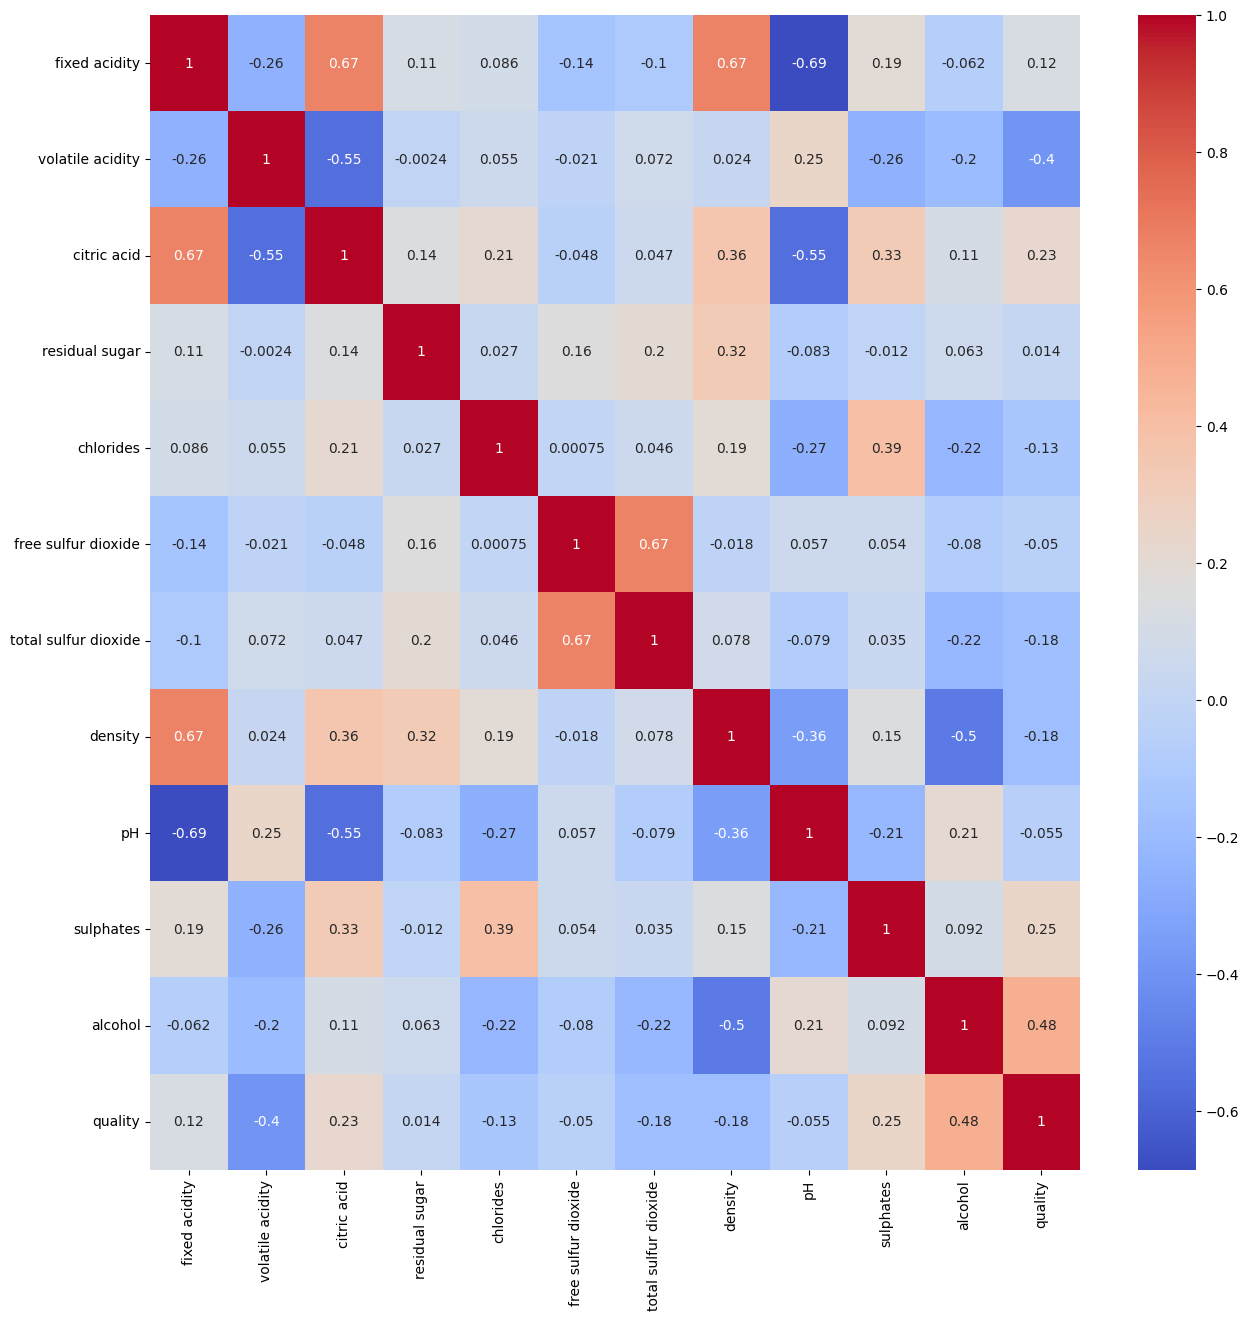

In [24]:
plt.figure(figsize=(15, 15))
correlation_matrix = df.corr()
heatmap =sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

<Axes: title={'center': 'Correlation with target'}>

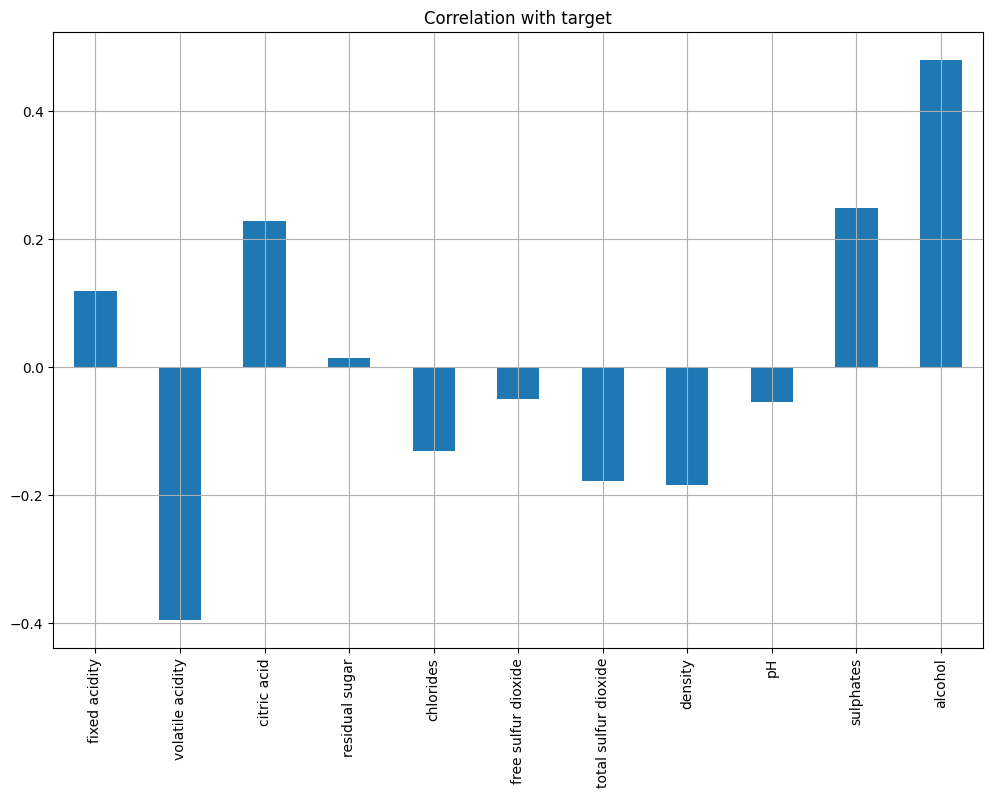

In [25]:
df.drop("quality", axis=1).corrwith(df.quality).plot(kind="bar", grid=True, figsize=(12, 8), title="Correlation with target")

c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Number of wines in each quality category')

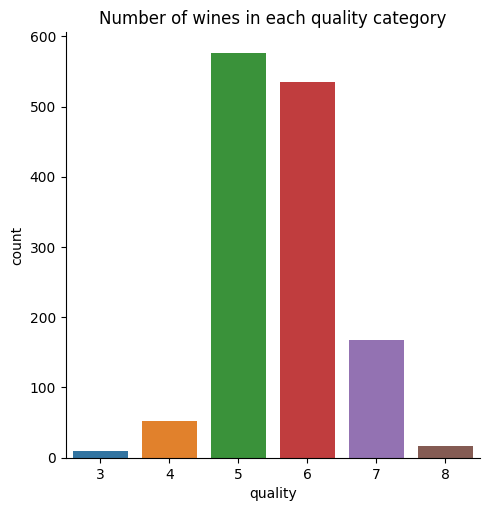

In [26]:
sns.catplot(x='quality',  data=df, kind='count')
plt.title('Number of wines in each quality category')

<Axes: xlabel='quality', ylabel='volatile acidity'>

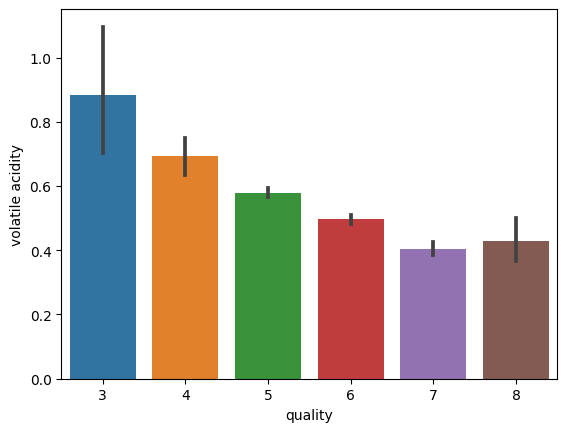

In [27]:
sns.barplot(x="quality", y="volatile acidity", data=df)

<Axes: xlabel='quality', ylabel='residual sugar'>

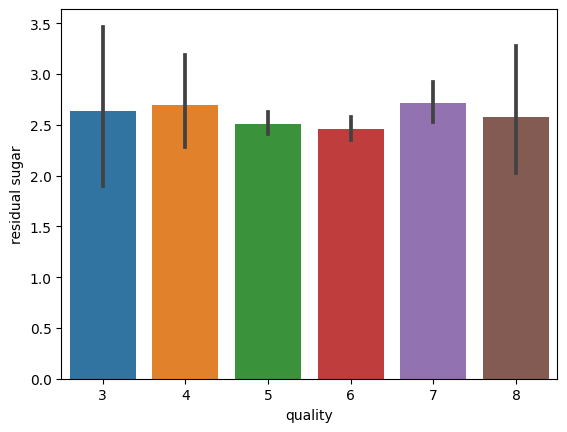

In [28]:
sns.barplot(x="quality", y="residual sugar", data=df)

In [29]:
MM = MinMaxScaler()

scaled_data = df.copy()
float_columns = scaled_data.select_dtypes(include=['float64']).columns

scaled_data[float_columns] = MM.fit_transform(scaled_data[float_columns])

In [30]:
scaled_data = scaled_data.drop("residual sugar", axis=1)

In [31]:
clean_data_set=scaled_data
clean_data_set

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
5,0.247788,0.369863,0.00,0.105175,0.169014,0.120141,0.567548,0.606299,0.137725,0.153846,5
...,...,...,...,...,...,...,...,...,...,...,...
1593,0.194690,0.342466,0.08,0.093489,0.380282,0.113074,0.472834,0.535433,0.293413,0.169231,6
1594,0.141593,0.328767,0.08,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,5
1595,0.115044,0.294521,0.10,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,6
1597,0.115044,0.359589,0.12,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,5


In [32]:
x = clean_data_set.drop("quality", axis=1)
y = clean_data_set["quality"].apply(lambda y_value:1 if y_value>=7 else 0)
y.value_counts()

quality
0    1175
1     184
Name: count, dtype: int64

In [33]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

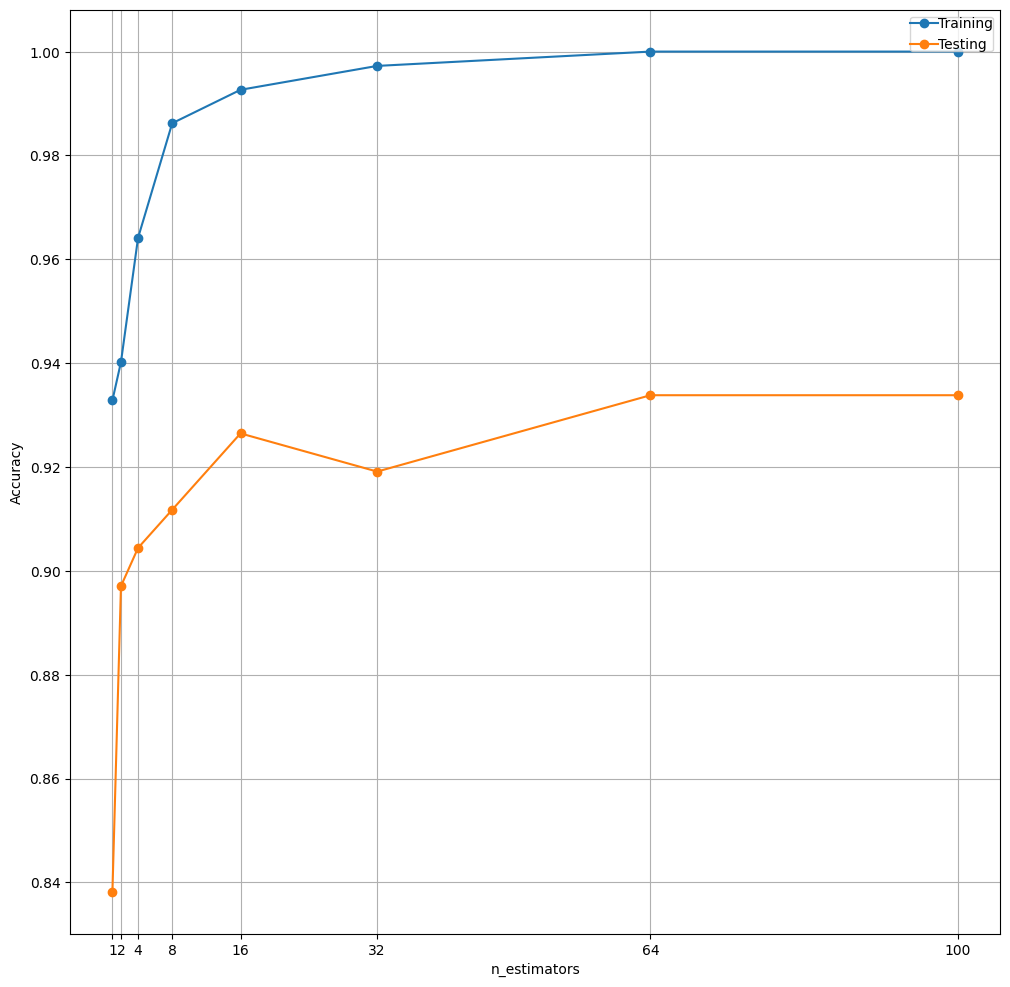

In [34]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]
accuracy_train, accuracy_test = [], []

for i in n_estimators:
    clf_rf = RandomForestClassifier(n_estimators=i, random_state=12345)
    clf_rf.fit(x_train, y_train)
    y_train_pred = clf_rf.predict(x_train)
    y_test_pred = clf_rf.predict(x_test)

    accuracy_train.append(metrics.accuracy_score(y_train, y_train_pred))
    accuracy_test.append(metrics.accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(12, 12))
plt.plot(n_estimators, accuracy_train, marker='o')
plt.plot(n_estimators, accuracy_test, marker='o')
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.legend(['Training', 'Testing'], loc='upper right', borderpad=0, handletextpad=0)

plt.xticks(n_estimators)
plt.grid(True)
plt.show()

In [35]:
model = RandomForestClassifier(max_depth=20, random_state=1, n_estimators=100)
model.fit(x_train, y_train)
test_pred = model.predict(x_train)
test_acc = accuracy_score(y_train, test_pred)
test_acc

1.0

In [36]:
valid_pred = model.predict(x_valid)
valid_acc = accuracy_score(y_valid, valid_pred)
valid_acc

0.8897058823529411

In [37]:
final_pred = model.predict(x_test)
final_acc = accuracy_score(y_test, final_pred)
final_acc

0.9411764705882353

In [38]:
model = LogisticRegression()
model.fit(x_train, y_train)
test_pred = model.predict(x_train)
test_acc = accuracy_score(y_train, test_pred)
test_acc

0.8675252989880404

In [39]:
valid_pred = model.predict(x_valid)
valid_acc = accuracy_score(y_valid, valid_pred)
valid_acc

0.8676470588235294

In [40]:
final_pred = model.predict(x_test)
final_acc = accuracy_score(y_test, final_pred)
final_acc

0.9117647058823529

In [41]:
model =DecisionTreeClassifier(max_depth=100, random_state=1)
model.fit(x_train, y_train)
test_pred = model.predict(x_train)
test_acc = accuracy_score(y_train, test_pred)
test_acc

1.0

In [42]:
valid_pred = model.predict(x_valid)
valid_acc = accuracy_score(y_valid, valid_pred)
valid_acc

0.8529411764705882

In [43]:
final_pred = model.predict(x_test)
final_acc = accuracy_score(y_test, final_pred)
final_acc

0.875

In [44]:
model =KNeighborsClassifier()
model.fit(x_train, y_train)
test_pred = model.predict(x_train)
test_acc = accuracy_score(y_train, test_pred)
test_acc

0.8988040478380864

In [45]:
valid_pred = model.predict(x_valid)
valid_acc = accuracy_score(y_valid, valid_pred)
valid_acc

0.8823529411764706

In [46]:
final_pred = model.predict(x_test)
final_acc = accuracy_score(y_test, final_pred)
final_acc

0.9191176470588235